# Bibliotecas

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Arboles de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# SVM
from sklearn import svm
# MLP
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

# Carga Datos

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# Divide datos de entrenamiento y de prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Clasifica con un árbol de decisión

In [8]:
# Crea el modelo 
arbol = DecisionTreeClassifier(criterion='entropy')

# Ajusta con los datos 
arbol.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Prueba de funcionamiento

In [9]:
y_apred = arbol.predict(X_test)

# Precisión del modelo
print("Precisión del modelo de árbol de decisión:", metrics.accuracy_score(y_test, y_apred))

print(iris.target_names)
metrics.confusion_matrix(y_test, y_apred)

Precisión del modelo de árbol de decisión: 0.9111111111111111
['setosa' 'versicolor' 'virginica']


array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  3, 13]])

[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 105\nvalue = [35, 36, 34]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.999\nsamples = 70\nvalue = [0, 36, 34]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 4.95\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.3, 'x[1] <= 2.45\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 3.0\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 3

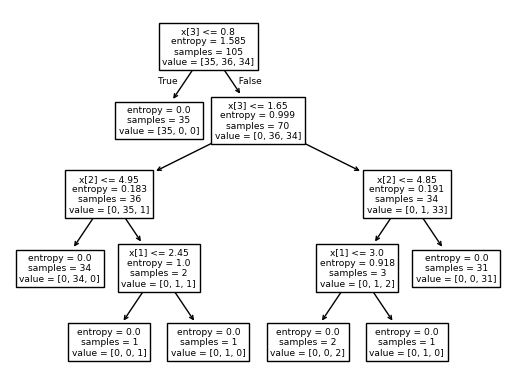

In [15]:
plot_tree(arbol)

## Clasifica con máquinas de soporte vectorial

In [16]:
# Crea el modelo
svm = svm.LinearSVC()

# Ajusta con los datos
svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


### Prueba de funcionamiento

In [17]:
y_apred_svm = svm.predict(X_test)

# Precisión del modelo
print("Precisión del modelo SVM:", metrics.accuracy_score(y_test, y_apred_svm))

print(iris.target_names)
metrics.confusion_matrix(y_test, y_apred_svm)

Precisión del modelo SVM: 0.9333333333333333
['setosa' 'versicolor' 'virginica']


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  3, 13]])

## Clasifica con un multilayer perceptron

In [35]:
# Crea el modelo
mlp = MLPClassifier(hidden_layer_sizes=(10),activation='tanh',max_iter=1000,random_state=7)

# Ajusta con los datos
mlp.fit(X_train, y_train)

c:\Users\molap\Documents\UAM\25-O\Aprendizaje Maquinal\Laboratorio\scikit\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,10
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,7


### Prueba de funcionamiento

In [36]:
y_apred_mlp = mlp.predict(X_test)

# Precisión del modelo
print("Precisión del modelo MLP:", metrics.accuracy_score(y_test, y_apred_mlp))

print(iris.target_names)
metrics.confusion_matrix(y_test, y_apred_mlp)

Precisión del modelo MLP: 0.9555555555555556
['setosa' 'versicolor' 'virginica']


array([[15,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 16]])